<a href="https://colab.research.google.com/github/AmrMKayid/ICCV2019-LearningToPaint/blob/master/LearningToPaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#@title #**Install/Import Libraries** { display-mode: "form" }

%%time
# !pip install tensorboardX

import os
import PIL.Image
import numpy as np
import moviepy.editor as mpy
from PIL import Image
from IPython.display import display, Image, clear_output

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26.9 µs


In [2]:
#@title #**Cloning Our LearningToPaint** { display-mode: "form" }
%%bash
rm -rf /content/* /content/.git* 2> /dev/null 
git clone https://github.com/Nodogoro/ICCV2019-LearningToPaint.git /tmp/LearningToPaint
mv /tmp/LearningToPaint/* /tmp/LearningToPaint/.git* . 
rm -rf /tmp/LearningToPaint

Cloning into '/tmp/LearningToPaint'...


In [3]:
#@title #**Downloading Renderer and Actor** { display-mode: "form" }

%%bash
wget "https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4" -O renderer.pkl
wget "https://drive.google.com/uc?export=download&id=1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR" -O actor.pkl
wget -U NoSuchBrowser/1.0 -O image/test.png https://raw.githubusercontent.com/hzwer/LearningToPaint/master/image/Trump.png

python3 baseline/test.py --max_step=80 --actor=actor.pkl --renderer=renderer.pkl --img=image/test.png --divide=5

ffmpeg -r 30 -f image2 -i output/generated%d.png -s 512x512 -c:v libx264 -pix_fmt yuv420p video.mp4 -q:v 0 -q:a 0

canvas step 0, L2Loss = 0.02452567219734192
canvas step 1, L2Loss = 0.015792880207300186
canvas step 2, L2Loss = 0.01133483462035656
canvas step 3, L2Loss = 0.009417219087481499
canvas step 4, L2Loss = 0.008396225050091743
canvas step 5, L2Loss = 0.007518625818192959
canvas step 6, L2Loss = 0.007007358595728874
canvas step 7, L2Loss = 0.006524830125272274
canvas step 8, L2Loss = 0.006030404474586248
canvas step 9, L2Loss = 0.005725936498492956
canvas step 10, L2Loss = 0.005527140107005835
canvas step 11, L2Loss = 0.005332828965038061
canvas step 12, L2Loss = 0.005135069601237774
canvas step 13, L2Loss = 0.005009436048567295
canvas step 14, L2Loss = 0.004933846183121204
canvas step 15, L2Loss = 0.0048149218782782555
canvas step 16, L2Loss = 0.004673273302614689
canvas step 17, L2Loss = 0.004517202265560627
canvas step 18, L2Loss = 0.004406205378472805
canvas step 19, L2Loss = 0.004245441872626543
canvas step 20, L2Loss = 0.004107201937586069
canvas step 21, L2Loss = 0.003997792955487966

--2020-08-25 15:39:29--  https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.100, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gm9o0032ln0oftdbe1l9bllrbcacg7i8/1598369925000/10102393604162075786/*/1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4?e=download [following]
--2020-08-25 15:39:30--  https://doc-0o-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gm9o0032ln0oftdbe1l9bllrbcacg7i8/1598369925000/10102393604162075786/*/1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4?e=download
Resolving doc-0o-58-docs.googleusercontent.com (doc-0o-58-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0o-58-docs.googleusercontent.com (doc-0o

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2383872/45929032 bytes (5.2%)6389760/45929032 bytes (13.9%)10485760/45929032 bytes (22.8%)14671872/45929032 bytes (31.9%)18907136/45929032 bytes (41.2%)23183360/45929032 bytes (50.5%)27443200/45929032 bytes (59.8%)31678464/45929032 bytes (69.0%)35987456/45929032 bytes (78.4%)39985152/45929032 bytes (87.1%)44277760/45929032 bytes (96.4%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

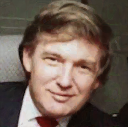

In [4]:
#@title #**Rendering output video** { display-mode: "form" }

display(mpy.ipython_display('video.mp4', height=256, max_duration=100.))
display(Image('output/generated399.png'))

## Dataset

In [ ]:
#@title #**Downloading CelebA Dataset** { display-mode: "form" }

%%bash

mkdir data && cd data && gdown https://drive.google.com/uc?id=1qgYITK5rGZPqTL4PWQpaUQLJ2WN9SnRf
unzip img_align_celeba.zip ##&& rm img_align_celeba.zip

In [ ]:
#@markdown ---
#@markdown ---
#@markdown ---

## Training

In [ ]:
#@title #**Training the Renderer** { display-mode: "form" }

!python3 baseline/train_renderer.py

In [ ]:
#@title #**Training** { display-mode: "form" }

!python3 baseline/train.py --max_step=200 --debug --batch_size=96

In [ ]:
#@markdown ---
#@markdown ---
#@markdown ---

## Testing 

Image photo.jpg is saved! with shape (512, 512, 3)


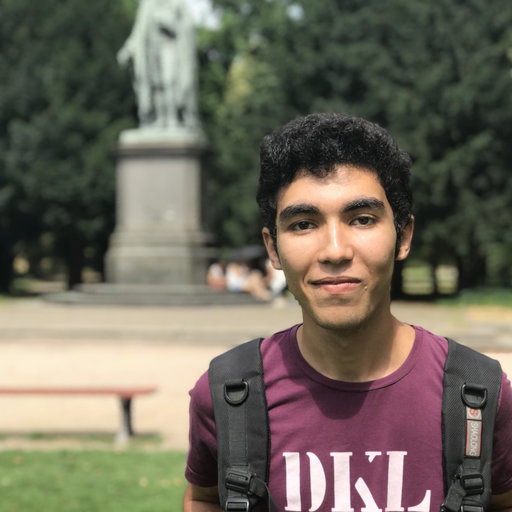

CPU times: user 214 ms, sys: 62 ms, total: 276 ms
Wall time: 39.8 s


In [45]:
#@title #**Add/Upload a photo with a face** { run: "auto", display-mode: "form" }
%%time

#@markdown ### You can choose between taking a photo through **WebCam**, **Upload** a photo from your device, or past a **URL** to get a photo.
!rm -rf /content/image/*
!rm -rf /content/output/*
!rm -rf /content/video/*

method = 'url' #@param ["webcam", "url", "upload"]

resolution = 512 #@param [256, 512, 1024]

if method == 'webcam':
  image, fn = utils.take_photo()
elif method == 'url':
  try:
    #@markdown ---
    url = 'https://i1.rgstatic.net/ii/profile.image/669945163694105-1536738782844_Q512/Amr_Kayid.jpg' #@param {type:"string"}
    !wget $url
    fp = url.split('/')[-1]
  except BaseException:
    print("Something went wrong. Try uploading photos from your computer")
else:
  image = files.upload()
  for fp in image.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fp, length=len(image[fp])))
    
if method != 'webcam':
  os.rename(fp, fp.replace(" ", ""))
  fp = fp.replace(" ", "")
  fn = 'photo.'+ fp.split('.')[-1]
  !mv $fp /content/image/$fn
  clear_output()
  print("Photo Saved\n")

  image = PIL.Image.open('/content/image/' + fn)
  wpercent = (resolution / float(image.size[0]))
  hsize = int((float(image.size[1])*float(wpercent)))
  image = image.resize((resolution, hsize), PIL.Image.LANCZOS)

#@markdown ---
#@markdown ---
#@markdown ---

#@markdown #**Testing new Baselines** { run: "auto", display-mode: "form" }


#@markdown *Slow method works 2 times longer, but has much higher quality.*
max_step = 50 #@param {type:"slider", min:10, max:1000, step:10}
#@markdown ---

divide = 7 #@param {type:"slider", min:1, max:10, step:1}

!python3 baseline/test.py --max_step=$max_step --actor=actor.pkl --renderer=renderer.pkl --img=image/photo.jpg --divide=$divide

!ffmpeg -r 30 -f image2 -i output/generated%d.png -s 512x512 -c:v libx264 -pix_fmt yuv420p video/video.mp4 -q:v 0 -q:a 0

clear_output()

print(f"Image {fn} is saved! with shape {np.array(image).shape}")
display(image)

In [46]:
#@title #**Display Generated video** { run: "auto", display-mode: "form" }

display(mpy.ipython_display('video/video.mp4', height=512, autoplay=1, loop=1, max_duration=500.))